#  Grid World: Policy Evaluation & Value Iteration

This notebook solves for the value functions in a $5 \times 5$ grid world using two dynamic programming methods simultaneously:

1.  **Policy Evaluation:** Calculates the state-value function $V_\pi(s)$ for a fixed, **uniform random policy** (where the agent chooses to go up, down, left, or right with equal probability, 0.25).
2.  **Value Iteration:** Calculates the **optimal** state-value function $V^*(s)$, which represents the maximum possible value achievable from each state.

##  Environment Rules

The grid world has specific rules for movement and rewards:

* **Grid Size:** $5 \times 5$ (states are `(row, col)` from `(0, 0)` to `(4, 4)`).
* **Actions:** `UP`, `DOWN`, `LEFT`, `RIGHT`.
* **Rewards:**
    * **Standard Move:** 0 reward for all standard moves from one cell to another.
    * **Hitting a Wall:** If an action moves the agent off the grid, the agent stays in the *same state* and receives a **-1 reward**.
    * **Special State A (0, 1):** From state `(0, 1)`, *any action* teleports the agent to state `(4, 1)` and gives a **+10 reward**.
    * **Special State B (0, 3):** From state `(0, 3)`, *any action* teleports the agent to state `(2, 3)` and gives a **+5 reward**.

##  Algorithm Parameters

* **Discount Factor ($\gamma$):** `GAMMA = 0.9`. This determines how much we value future rewards.
* **Policy ($\pi$):** For Policy Evaluation, we use a uniform random policy. `POLICY_PROB = 0.25` for each of the 4 actions.
* **Convergence:** The algorithm stops when the change in value functions between iterations is less than `CONVERGENCE_THRESHOLD = 0.001`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1. Setup Parameters**

In [2]:
GRID_SIZE = 5
GAMMA = 0.9  # Discount factor (original 'la')
POLICY_PROB = 0.25  # Probability for each action in the random policy (original 'pol')
ACTIONS = ['UP', 'DOWN', 'LEFT', 'RIGHT']
MAX_ITERATIONS = 1000
CONVERGENCE_THRESHOLD = 0.001

# Initialize value functions
# state_values -> V_pi(s) for the random policy (original 'v')
# optimal_state_values -> V*(s) for the optimal policy (original 'vo')
state_values = np.zeros((GRID_SIZE, GRID_SIZE))
optimal_state_values = np.zeros((GRID_SIZE, GRID_SIZE))

**2. Environment Dynamics Function**

In [3]:
def get_next_state_and_reward(i, j, action):
    """
    Calculates the next state (next_i, next_j) and the immediate reward
    given a current state (i, j) and an action.
    """
    
    # Check for special state A: (0, 1) -> (4, 1) with +10 reward
    if (i, j) == (0, 1):
        return 4, 1, 10
    
    # Check for special state B: (0, 3) -> (2, 3) with +5 reward
    if (i, j) == (0, 3):
        return 2, 3, 5

    # Calculate intended next state
    next_i, next_j = i, j
    if action == 'UP':
        next_i = i - 1
    elif action == 'DOWN':
        next_i = i + 1
    elif action == 'LEFT':
        next_j = j - 1
    elif action == 'RIGHT':
        next_j = j + 1

    # Check for boundary (wall)
    if next_i < 0 or next_i >= GRID_SIZE or next_j < 0 or next_j >= GRID_SIZE:
        # Hit a wall: stay in the same state, reward -1
        return i, j, -1
    else:
        # Standard move: new state, reward 0
        return next_i, next_j, 0

**3. Main Iteration Loop**

In [4]:
print("Running Policy Evaluation and Value Iteration...")

for iteration in range(MAX_ITERATIONS):
    
    # Create new arrays to hold the updated values for this iteration
    next_state_values = np.zeros_like(state_values)
    next_optimal_state_values = np.zeros_like(optimal_state_values)

    # Iterate over every state in the grid
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            
            v_s = 0  # The new value for state (i, j)
            optimal_action_values = [] # For Value Iteration

            for action in ACTIONS:
                # Get the outcome of taking this action
                next_i, next_j, reward = get_next_state_and_reward(i, j, action)
                
                # --- 3a. Policy Evaluation (Bellman Expectation Equation) ---
                action_value = reward + GAMMA * state_values[next_i, next_j]
                v_s += POLICY_PROB * action_value
                
                # --- 3b. Value Iteration (Bellman Optimality Equation) ---
                optimal_action_value = reward + GAMMA * optimal_state_values[next_i, next_j]
                optimal_action_values.append(optimal_action_value)

            # Assign the new values
            next_state_values[i, j] = v_s
            next_optimal_state_values[i, j] = max(optimal_action_values)

    # --- Check for Convergence ---
    
    if (np.allclose(state_values, next_state_values, atol=CONVERGENCE_THRESHOLD) and
        np.allclose(optimal_state_values, next_optimal_state_values, atol=CONVERGENCE_THRESHOLD)):
        
        print(f"\nConverged after {iteration + 1} iterations.")
        state_values = next_state_values.copy()
        optimal_state_values = next_optimal_state_values.copy()
        break

    # Update the value functions for the next iteration
    state_values = next_state_values.copy()
    optimal_state_values = next_optimal_state_values.copy()

Running Policy Evaluation and Value Iteration...

Converged after 88 iterations.


**4. Display Results**


--- State Values (Random Policy) ---
[[ 3.3  8.8  4.4  5.3  1.5]
 [ 1.5  3.   2.3  1.9  0.5]
 [ 0.1  0.7  0.7  0.4 -0.4]
 [-1.  -0.4 -0.4 -0.6 -1.2]
 [-1.9 -1.3 -1.2 -1.4 -2. ]]

--- Optimal State Values (V*) ---
[[22.  24.4 22.  19.4 17.5]
 [19.8 22.  19.8 17.8 16. ]
 [17.8 19.8 17.8 16.  14.4]
 [16.  17.8 16.  14.4 13. ]
 [14.4 16.  14.4 13.  11.7]]

Generating visual heatmaps...


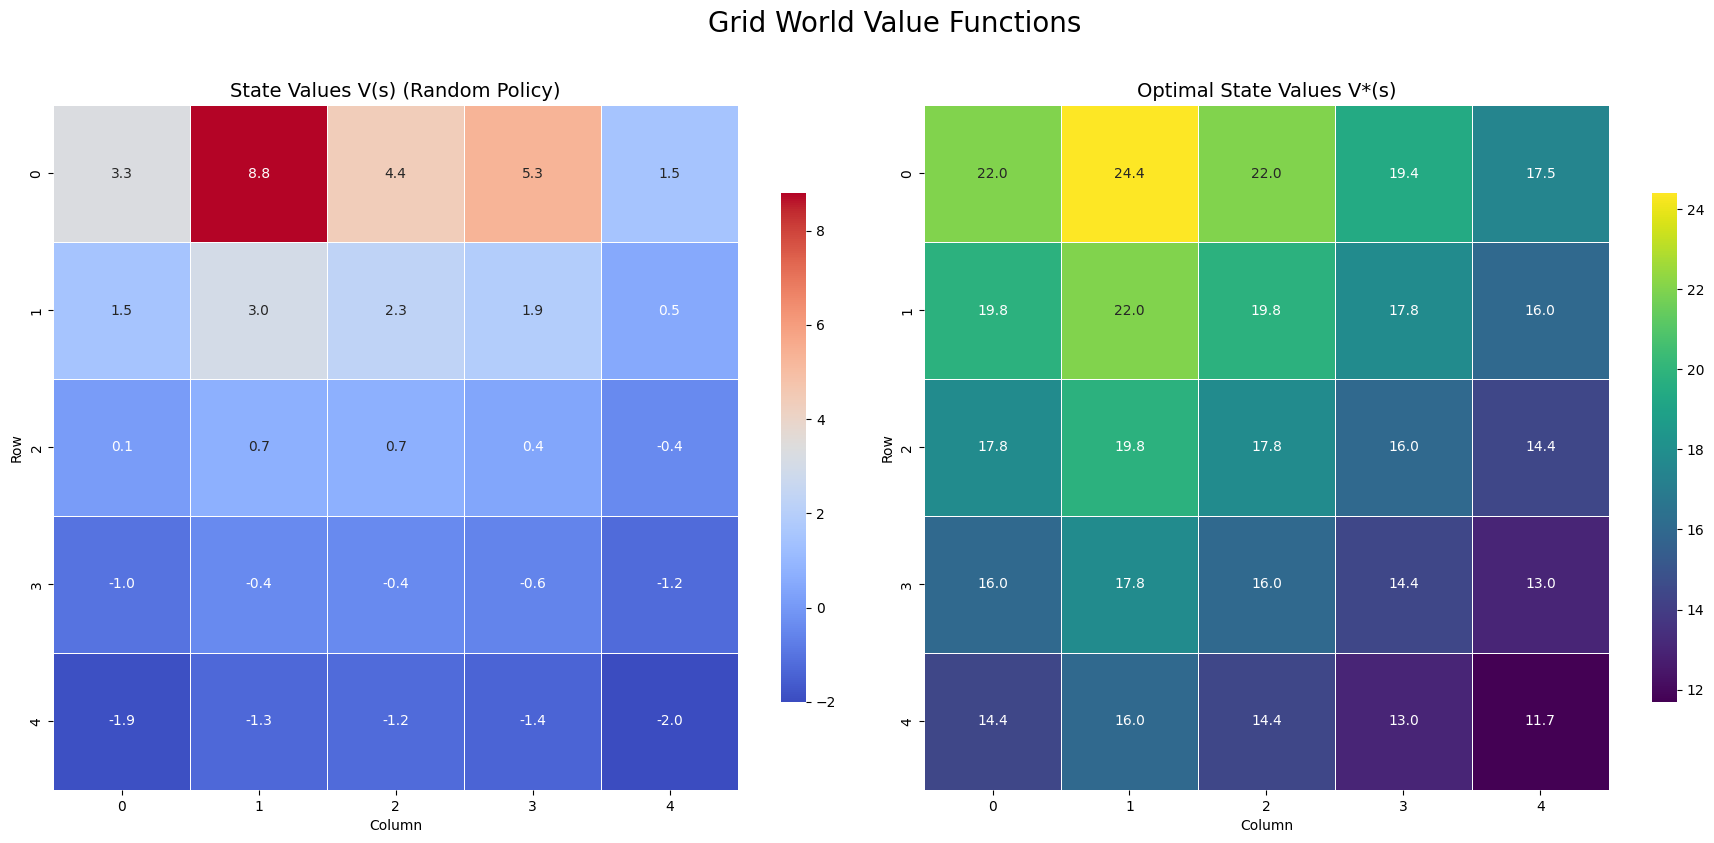

In [5]:
# Round the final results
final_state_values = np.round(state_values, 1)
final_optimal_state_values = np.round(optimal_state_values, 1)

# --- Print Raw Data ---
print("\n--- State Values (Random Policy) ---")
print(final_state_values)

print("\n--- Optimal State Values (V*) ---")
print(final_optimal_state_values)

# --- Create Visual Heatmaps ---
print("\nGenerating visual heatmaps...")

# We want 1 row, 2 columns for side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Grid World Value Functions', fontsize=20, y=1.02)

# heatmap keyword arguments
heatmap_kws = {
    'annot': True,         
    'fmt': ".1f",          
    'linewidths': 0.5,       
    'square': True,        
    'cbar_kws': {"shrink": .7} # 
}

# Plot 1: State Values (Random Policy)
sns.heatmap(
    final_state_values,
    cmap="coolwarm",  
    ax=ax1,
    **heatmap_kws
)
ax1.set_title('State Values V(s) (Random Policy)', fontsize=14)
ax1.set_xlabel('Column')
ax1.set_ylabel('Row')

# Plot 2: Optimal State Values (V*)
sns.heatmap(
    final_optimal_state_values,
    cmap="viridis",    
    ax=ax2,
    **heatmap_kws
)
ax2.set_title('Optimal State Values V*(s)', fontsize=14)
ax2.set_xlabel('Column')
ax2.set_ylabel('Row')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

* **State Values (Random Policy):** This map (using the "coolwarm" colormap) shows the expected value of following a completely random policy.
    * Notice the values are generally low, with many negative states near the walls (since randomly bumping into a wall is likely).
    * The "hot" (red) spots are near the special states, but the value is "diffused" because the random policy will often walk away from the reward.

* **Optimal State Values (V\*):** This map (using the "viridis" colormap) shows the *best possible value* you can get from any state.
    * The values are much higher! This is because the optimal policy learns to *avoid* walls and *actively seek* the special reward states.
    * You can see a clear "path" of high-value states (yellow) leading towards `(0, 1)` and `(0, 3)`, which are the most valuable states to be in or near.
    * States `(0, 1)` and `(0, 3)` are the brightest, as they provide the highest immediate rewards.